In [1]:
import os
from surfer import Brain, io
from nilearn import image
from IPython.display import Image

%pylab inline


"""Bring up the visualization"""
brain = Brain("fsaverage", "split", "inflated",
              views=['lat', 'med'], background="white",offscreen=True)

"""Project the volume file and return as an array"""
mri_file = "./DMN_pair_diff.nii.gz"
reg_file = os.path.join("/opt/freesurfer","average/mni152.register.dat")
surf_data_lh = io.project_volume_data(mri_file, "lh", reg_file,smooth_fwhm=0)
surf_data_rh = io.project_volume_data(mri_file, "rh", reg_file,smooth_fwhm=0)

"""
You can pass this array to the add_overlay method for a typical activation
overlay (with thresholding, etc.).
"""
brain.add_overlay(surf_data_lh, min=.5, max=5, name="ang_corr_lh", hemi='lh')
brain.add_overlay(surf_data_rh, min=.5, max=5, name="ang_corr_rh", hemi='rh')

brain.save_montage()
# brain.save_image('./FB+NFB+DMN-PC.jpg')
# brain.close()

# Image('./FB+NFB+DMN-PC.jpg')


Populating the interactive namespace from numpy and matplotlib
mri_vol2surf --mov ./DMN_pair_diff.nii.gz --hemi lh --surf white --reg /opt/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --o /tmp/pysurfer-v2sWYeTpl.mgz
mri_vol2surf --mov ./DMN_pair_diff.nii.gz --hemi rh --surf white --reg /opt/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --o /tmp/pysurfer-v2sp9qV3O.mgz


AssertionError: 

/home/jmuraskin/miniconda/envs/cpac040/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


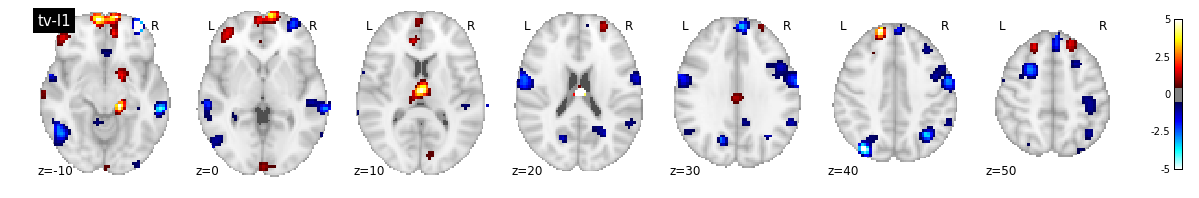

In [2]:

from nilearn.plotting import plot_stat_map
from nilearn.image import math_img,new_img_like
imgname='FB+NFB-Performance-Classification-1000-Bootstrap.nii.gz'

plot_stat_map(imgname, title="tv-l1", display_mode="z",cut_coords=range(-10,60,10),threshold=0.5,vmax=5)



In [ ]:
cope=1
threshold=0.949
TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/all/cope%d/cope%d/cope%d_tfce_corrp_tstat1.nii.gz' % (cope,cope,cope)
posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/all/cope%d/cope%d/cope%d_tstat1.nii.gz' % (cope,cope,cope)
TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/all/cope%d/cope%d/cope%d_tfce_corrp_tstat2.nii.gz' % (cope,cope,cope)
negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/all/cope%d/cope%d/cope%d_tstat2.nii.gz' % (cope,cope,cope)

pos=image.math_img("np.multiply(img1,img2)",
                     img1=image.threshold_img(TFCEposImg,threshold=threshold),img2=posImg)
neg=image.math_img("np.multiply(img1,img2)",
                     img1=image.threshold_img(TFCEnegImg,threshold=threshold),img2=negImg)
fw=image.math_img("img1-img2",img1=pos,img2=neg)

fw.to_filename("tempFile.nii.gz")

"""Bring up the visualization"""
brain = Brain("fsaverage", "split", "inflated",
              views=['lat', 'med'], background="white")

"""Project the volume file and return as an array"""
mri_file = "tempFile.nii.gz"
reg_file = os.path.join("/opt/freesurfer","average/mni152.register.dat")
surf_data_lh = io.project_volume_data(mri_file, "lh", reg_file,smooth_fwhm=1.5)
surf_data_rh = io.project_volume_data(mri_file, "rh", reg_file,smooth_fwhm=1.5)

"""
You can pass this array to the add_overlay method for a typical activation
overlay (with thresholding, etc.).
"""
brain.add_overlay(surf_data_lh, min=2, max=5, name="ang_corr_lh", hemi='lh')
brain.add_overlay(surf_data_rh, min=2, max=5, name="ang_corr_rh", hemi='rh')

brain.save_image('./cope%d.png' % cope)
brain.close()

Image('./cope%d.png' % cope)


In [ ]:
cope=1
threshold=0.949
TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/all/cope%d/cope%d/cope%d_tfce_corrp_tstat1.nii.gz' % (cope,cope,cope)
posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/all/cope%d/cope%d/cope%d_tstat1.nii.gz' % (cope,cope,cope)
TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/all/cope%d/cope%d/cope%d_tfce_corrp_tstat2.nii.gz' % (cope,cope,cope)
negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/noFeedback/all/cope%d/cope%d/cope%d_tstat2.nii.gz' % (cope,cope,cope)

pos=image.math_img("np.multiply(img1,img2)",
                     img1=image.threshold_img(TFCEposImg,threshold=threshold),img2=posImg)
neg=image.math_img("np.multiply(img1,img2)",
                     img1=image.threshold_img(TFCEnegImg,threshold=threshold),img2=negImg)
fw=image.math_img("img1-img2",img1=pos,img2=neg)

fw.to_filename("tempFile.nii.gz")

"""Bring up the visualization"""
brain = Brain("fsaverage", "split", "inflated",
              views=['lat', 'med'], background="white")

"""Project the volume file and return as an array"""
mri_file = "tempFile.nii.gz"
reg_file = os.path.join("/opt/freesurfer","average/mni152.register.dat")
surf_data_lh = io.project_volume_data(mri_file, "lh", reg_file,smooth_fwhm=1.5)
surf_data_rh = io.project_volume_data(mri_file, "rh", reg_file,smooth_fwhm=1.5)

"""
You can pass this array to the add_overlay method for a typical activation
overlay (with thresholding, etc.).
"""
brain.add_overlay(surf_data_lh, min=2, max=5, name="ang_corr_lh", hemi='lh')
brain.add_overlay(surf_data_rh, min=2, max=5, name="ang_corr_rh", hemi='rh')

brain.save_image('./cope%d.png' % cope)
brain.close()

Image('./cope%d.png' % cope)


/home/jmuraskin/miniconda/envs/cpac040/lib/python2.7/site-packages/nilearn/_utils/param_validation.py:61: UserWarning: The given float value must not exceed 0.17876984179. But, you have given threshold=0.949 
  threshold))


mri_vol2surf --mov tempFile.nii.gz --hemi lh --surf white --reg /opt/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 1.5 --o /tmp/pysurfer-v2sW4ZvdR.mgz
mri_vol2surf --mov tempFile.nii.gz --hemi rh --surf white --reg /opt/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 1.5 --o /tmp/pysurfer-v2sbZyVG0.mgz


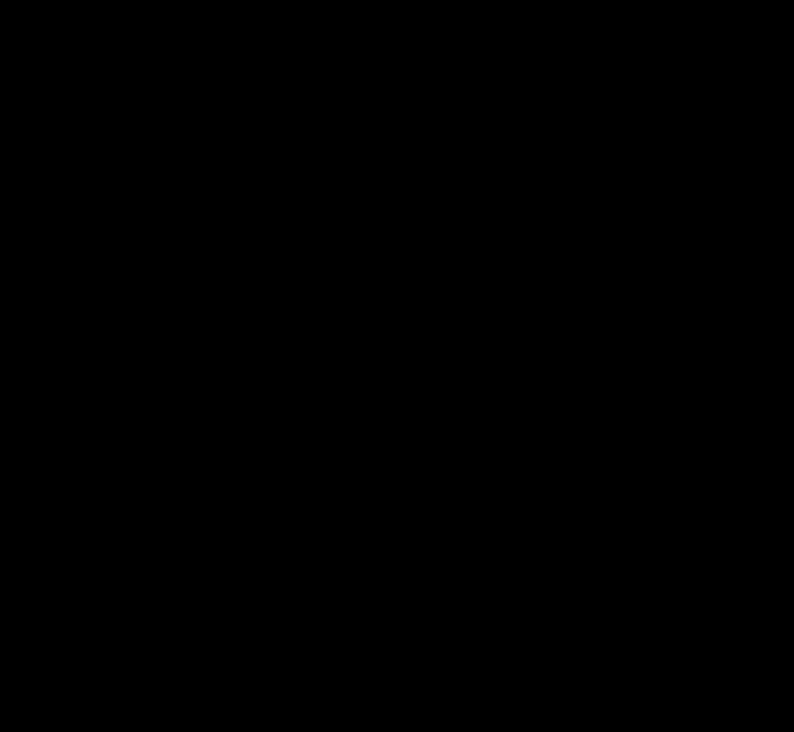

In [7]:
cope=1
threshold=0.949
TFCEposImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/PPI_DMN/randomise/paired-Ttest/all/cope3/cope3/cope3_tfce_corrp_tstat1.nii.gz'
posImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/PPI_DMN/randomise/paired-Ttest/all/cope3/cope3/cope3_tstat1.nii.gz'
TFCEnegImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/PPI_DMN/randomise/paired-Ttest/all/cope3/cope3/cope3_tfce_corrp_tstat2.nii.gz'
negImg='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/PPI_DMN/randomise/paired-Ttest/all/cope3/cope3/cope3_tstat2.nii.gz'

pos=image.math_img("np.multiply(img1,img2)",
                     img1=image.threshold_img(TFCEposImg,threshold=threshold),img2=posImg)
neg=image.math_img("np.multiply(img1,img2)",
                     img1=image.threshold_img(TFCEnegImg,threshold=threshold),img2=negImg)
fw=image.math_img("img1-img2",img1=pos,img2=neg)

fw.to_filename("tempFile.nii.gz")

"""Bring up the visualization"""
brain = Brain("fsaverage", "split", "inflated",
              views=['lat', 'med'], background="white")

"""Project the volume file and return as an array"""
mri_file = "tempFile.nii.gz"
reg_file = os.path.join("/opt/freesurfer","average/mni152.register.dat")
surf_data_lh = io.project_volume_data(mri_file, "lh", reg_file,smooth_fwhm=1.5)
surf_data_rh = io.project_volume_data(mri_file, "rh", reg_file,smooth_fwhm=1.5)

"""
You can pass this array to the add_overlay method for a typical activation
overlay (with thresholding, etc.).
"""
brain.add_overlay(surf_data_lh, min=2, max=5, name="ang_corr_lh", hemi='lh')
brain.add_overlay(surf_data_rh, min=2, max=5, name="ang_corr_rh", hemi='rh')

brain.save_image('./DMN_PPI_paired.png')
brain.close()

Image('./DMN_PPI_paired.png')


In [8]:
help(brain.save_image)

Help on method save_image in module surfer.viz:

save_image(self, filename) method of surfer.viz.Brain instance
    Save view from all panels to disk
    
    Only mayavi image types are supported:
    (png jpg bmp tiff ps eps pdf rib  oogl iv  vrml obj
    
    Parameters
    ----------
    filename: string
        path to new image file
    
    Due to limitations in TraitsUI, if multiple views or hemi='split'
    is used, there is no guarantee painting of the windows will
    complete before control is returned to the command line. Thus
    we strongly recommend using only one figure window (which uses
    a Mayavi figure to plot instead of TraitsUI) if you intend to
    script plotting commands.



In [5]:
import CCD_packages
reload(CCD_packages)


CCD_packages.make_pysurfer_images(folder='/home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/all/cope3_age_gender/',suffix='cope3')

/home/jmuraskin/miniconda/envs/cpac040/lib/python2.7/site-packages/nilearn/_utils/param_validation.py:61: UserWarning:

The given float value must not exceed 0.360973775387. But, you have given threshold=0.9499 



mri_vol2surf --mov /home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/all/cope3_age_gender//thresholded_posneg.nii.gz --hemi lh --surf white --reg /opt/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 1.5 --o /tmp/pysurfer-v2stb1Apz.mgz
mri_vol2surf --mov /home/jmuraskin/Projects/CCD/working_v1/groupAnalysis/randomise/Feedback/all/cope3_age_gender//thresholded_posneg.nii.gz --hemi rh --surf white --reg /opt/freesurfer/average/mni152.register.dat --projfrac-avg 0 1 0.1 --surf-fwhm 1.5 --o /tmp/pysurfer-v2sqsRRO0.mgz
